<a href="https://colab.research.google.com/github/codeschris/mnist-tf-demo-for-talk/blob/main/TensorFlow_x_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


## Building a Neural Network Model with TensorFlow

Below is a snippet for a basic neural network to classify handwritten digits (MNIST dataset). The MNIST database (Modified National Institute of Standards and Technology database) is a large collection of handwritten digits.

### Steps taken

1. Import the required TensorFlow dependencies and MNIST library
2. Load the MNIST dataset into 2 sets: training and testing sets
3. Normalize the data by scaling the pixel of the images from range of 0 - 255 to a range of 0 - 1
4. Define the layers of the Neural Network using the Sequential model from the Keras API. A summary of the layers is as follows:
  - Input: 28x28 grayscale images.
  - Layer 1 (Flatten): Converts the 2D image to a 1D array of 784 elements.
  - Layer 2 (Dense): 128 neurons with ReLU activation, acting as the hidden layer to learn features.
  - Layer 3 (Dense): 10 neurons with softmax activation, providing the final classification probabilities.
5. Compile and train the models. Optimizer used is `Adaptive Moment Estimation (adam)`, loss function used is `Sparse Categorical Crossentropy` and the metrics used is the `Accuracy` metric.
6. Obtain the summary of the model
7. Display images and the predicted results


In [ ]:
import numpy as np # For scientific computing
import matplotlib.pyplot as plt # For plotting images and results of the model
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist


In [ ]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize data
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the Neural Network Model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Layer 1: Flatten
    layers.Dense(128, activation='relu'),  # Layer 2: Dense with ReLU activation
    layers.Dense(10, activation='softmax') # Layer 3: Dense with Softmax activation
])

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2601 - accuracy: 0.9258
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1152 - accuracy: 0.9666
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0785 - accuracy: 0.9764
Epoch 4/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0573 - accuracy: 0.9820
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0441 - accuracy: 0.9860


In [ ]:
# Obtain summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1/1 [==============================] - 0s 261ms/step


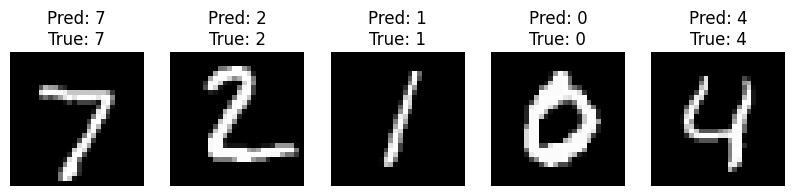

In [ ]:
# Predict the first 5 images in the test set
predictions = model.predict(test_images[:5])

# Define a function to plot images with their predictions
def plot_images_with_predictions(images, predictions, true_labels, num_images=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Pred: {np.argmax(predictions[i])}\nTrue: {true_labels[i]}")
        plt.axis('off')
    plt.show()

plot_images_with_predictions(test_images, predictions, test_labels, num_images=5)